In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import all required libraries 
%pylab inline
import cv2
import numpy as np 
import pandas as pd
import pytesseract
import matplotlib.pyplot as plt
import statistics
from time import sleep
import random
from google.colab.patches import cv2_imshow
from imutils import contours


Populating the interactive namespace from numpy and matplotlib


In [ ]:
!pip install --ignore-installed Pillow==9.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-9.0.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
#@title Default title text


# Load image, grayscale, Otsu's threshold
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Resources/BangDiem4.jpg')
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove text characters with morph open and contour filtering
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
cnts = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 500:
        cv2.drawContours(opening, [c], -1, (0,0,0), -1)

# Repair table lines, sort contours, and extract ROI
close = 255 - cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=1)
cnts = cv2.findContours(close, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
(cnts, _) = contours.sort_contours(cnts, method="top-to-bottom")
for c in cnts:
    area = cv2.contourArea(c)
    if area < 25000:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), -1)
        ROI = original[y:y+h, x:x+w]

        # Visualization
        #cv2_imshow(image)
        #cv2_imshow(ROI)

#cv2_imshow( opening)
#cv2_imshow(close)
#cv2_imshow(image)

In [ ]:
#@title Default title text


img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Resources/BangDiem4.jpg',0)

# for adding border to an image
img1= cv2.copyMakeBorder(img,50,50,50,50,cv2.BORDER_CONSTANT,value=[255,255])

# Thresholding the image
(thresh, th3) = cv2.threshold(img1, 255, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

# to flip image pixel values
th3 = 255-th3

# initialize kernels for table boundaries detections
if(th3.shape[0]<1000):
    ver = np.array([[1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1]])
    hor = np.array([[1,1,1,1,1,1]])

else:
    ver = np.array([[1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1],
               [1]])
    hor = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])




# to detect vertical lines of table borders
img_temp1 = cv2.erode(th3, ver, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, ver, iterations=3)

# to detect horizontal lines of table borders
img_hor = cv2.erode(th3, hor, iterations=3)
hor_lines_img = cv2.dilate(img_hor, hor, iterations=4)

# adding horizontal and vertical lines
hor_ver = cv2.add(hor_lines_img,verticle_lines_img)

hor_ver = 255-hor_ver

# subtracting table borders from image
temp = cv2.subtract(th3,hor_ver)

temp = 255-temp

#Doing xor operation for erasing table boundaries
tt = cv2.bitwise_xor(img1,temp)

iii = cv2.bitwise_not(tt)

tt1=iii.copy()

#kernel initialization
ver1 = np.array([[1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1],
               [1,1]])
hor1 = np.array([[1,1,1,1,1,1,1,1,1,1],
               [1,1,1,1,1,1,1,1,1,1]])

#morphological operation
temp1 = cv2.erode(tt1, ver1, iterations=2)
verticle_lines_img1 = cv2.dilate(temp1, ver1, iterations=3)

temp12 = cv2.erode(tt1, hor1, iterations=1)
hor_lines_img2 = cv2.dilate(temp12, hor1, iterations=3)

# doing or operation for detecting only text part and removing rest all
hor_ver = cv2.add(hor_lines_img2,verticle_lines_img1)
dim1 = (hor_ver.shape[1],hor_ver.shape[0])
dim = (hor_ver.shape[1]*2,hor_ver.shape[0]*2)

# resizing image to its double size to increase the text size
resized = cv2.resize(hor_ver, dim, interpolation = cv2.INTER_AREA)

#bitwise not operation for fliping the pixel values so as to apply morphological operation such as dilation and erode
want = cv2.bitwise_not(resized)

if(want.shape[0]<1000):
    kernel1 = np.array([[1,1,1]])
    kernel2 = np.array([[1,1],
                        [1,1]])
    kernel3 = np.array([[1,0,1],[0,1,0],
                       [1,0,1]])
else:
    kernel1 = np.array([[1,1,1,1,1,1]])
    kernel2 = np.array([[1,1,1,1,1],
                        [1,1,1,1,1],
                        [1,1,1,1,1],
                        [1,1,1,1,1]])

tt1 = cv2.dilate(want,kernel1,iterations=2)

# getting image back to its original size
resized1 = cv2.resize(tt1, dim1, interpolation = cv2.INTER_AREA)

# Find contours for image, which will detect all the boxes
contours1, hierarchy1 = cv2.findContours(resized1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#function to sort contours by its x-axis (top to bottom)
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=reverse))

    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)


#sorting contours by calling fuction
(cnts, boundingBoxes) = sort_contours(contours1, method="top-to-bottom")

#storing value of all bouding box height
heightlist=[]
for i in range(len(boundingBoxes)):
    heightlist.append(boundingBoxes[i][3])

#sorting height values
heightlist.sort()

sportion = int(.5*len(heightlist))
eportion = int(0.05*len(heightlist))

#taking 50% to 95% values of heights and calculate their mean 
#this will neglect small bounding box which are basically noise 
try:
    medianheight = statistics.mean(heightlist[-sportion:-eportion])
except:
    medianheight = statistics.mean(heightlist[-sportion:-2])

#keeping bounding box which are having height more then 70% of the mean height and deleting all those value where 
# ratio of width to height is less then 0.9
box =[]
X = []
imag = iii.copy()
for i in range(len(cnts)):    
    cnt = cnts[i]
    x,y,w,h = cv2.boundingRect(cnt)
    if(h>=.2*medianheight and w/h > 0.9):
        image = cv2.rectangle(imag,(x+4,y-2),(x+w-5,y+h),(0,255,0),1)
        box.append([x,y,w,h])
        X.append(image[x:y , 0:100])
        cv2_imshow(image[x:y , 0:100])
    # to show image
#cv2_imshow(image)

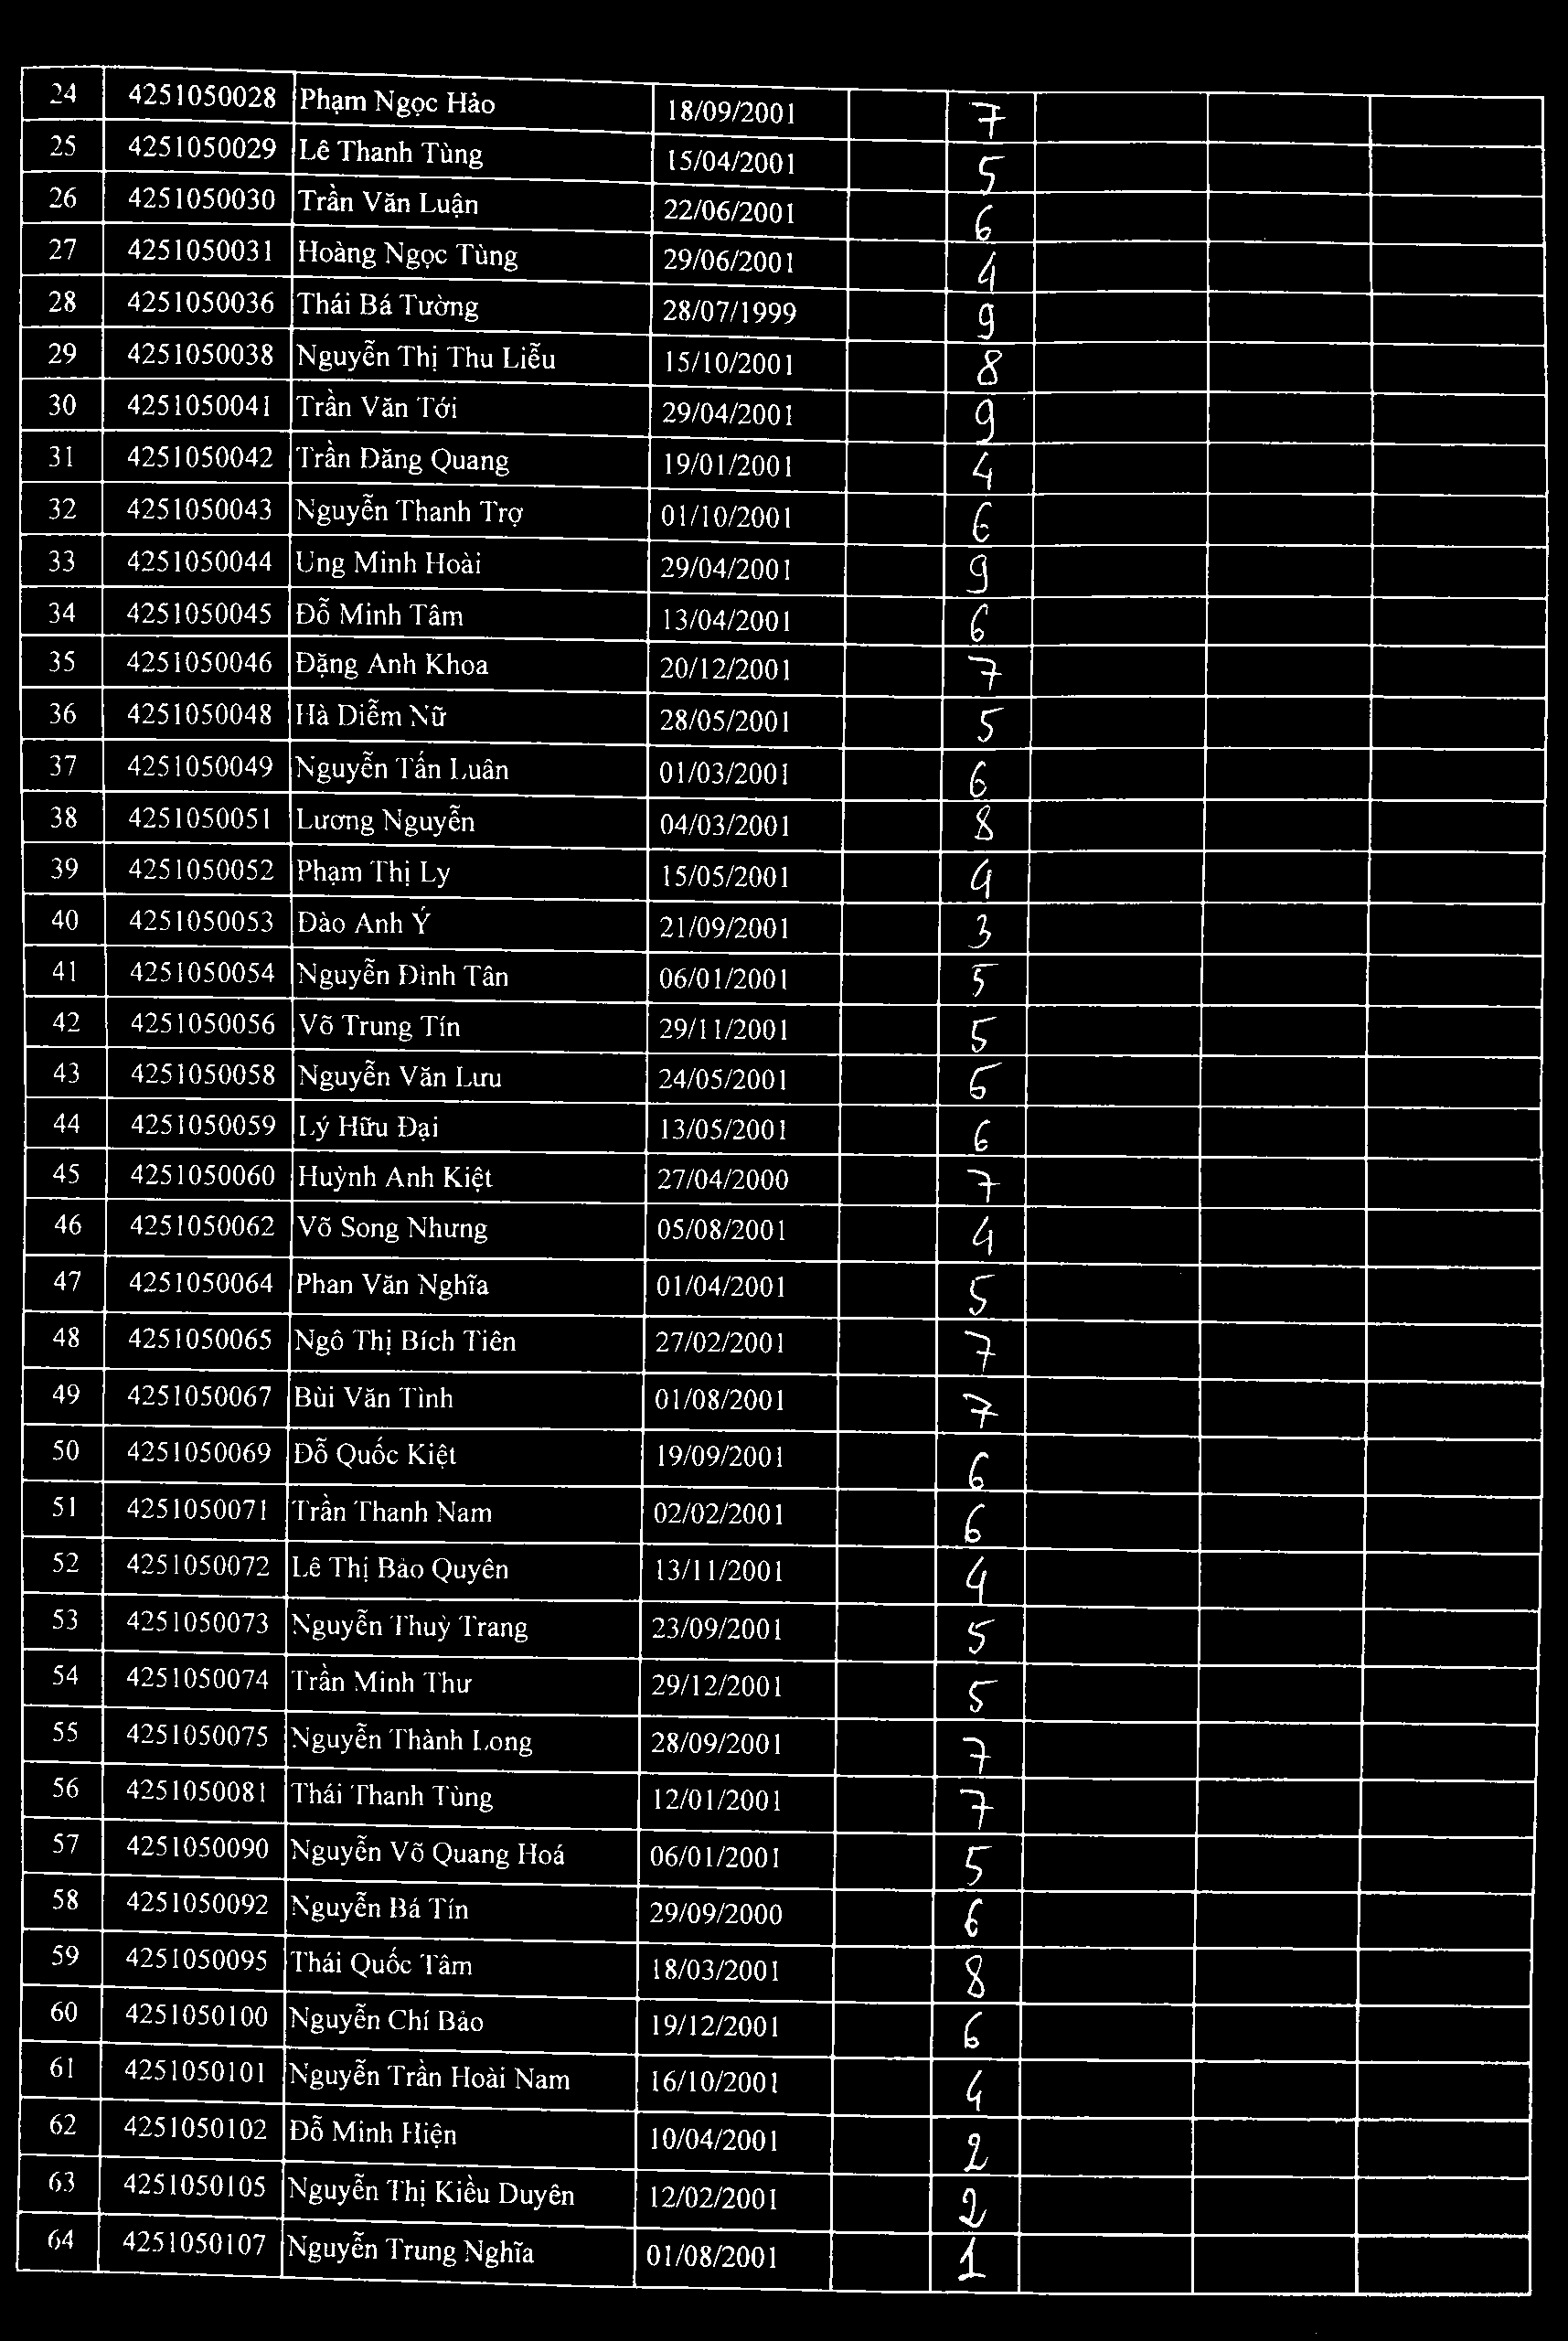

In [ ]:
# đọc ảnh dưới dạng ảnh xám
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Resources/BangDiem4.jpg',0)

# phân ngưỡng ảnh
(thresh, img_bin) = cv2.threshold(img, 240, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

# inverting the image
img_bin = 255-img_bin 
cv2_imshow(img_bin)
# Defining a kernel length
kernel_length = np.array(img).shape[1]//80

# A verticle kernel of (1 X kernel_length), phát hiện hàng chiều dọc của ảnh.
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))# A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))# A kernel of (3 X 3) ones.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Morphological operation to detect vertical lines from an image
img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
#cv2_imshow(verticle_lines_img)

# Morphological operation to detect horizontal lines from an image
img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
#cv2_imshow(horizontal_lines_img)


In [ ]:
diem = (7, 5, 6, 4, 9, 8, 9, 4, 6, 9, 6, 7, 5, 6, 8, 4, 3, 5, 5, 5, 6, 7, 4, 5, 7, 7, 6, 6, 4, 5, 5, 7, 7, 5, 6, 8, 6, 4, 2, 2, 1)
print(len(diem))

41


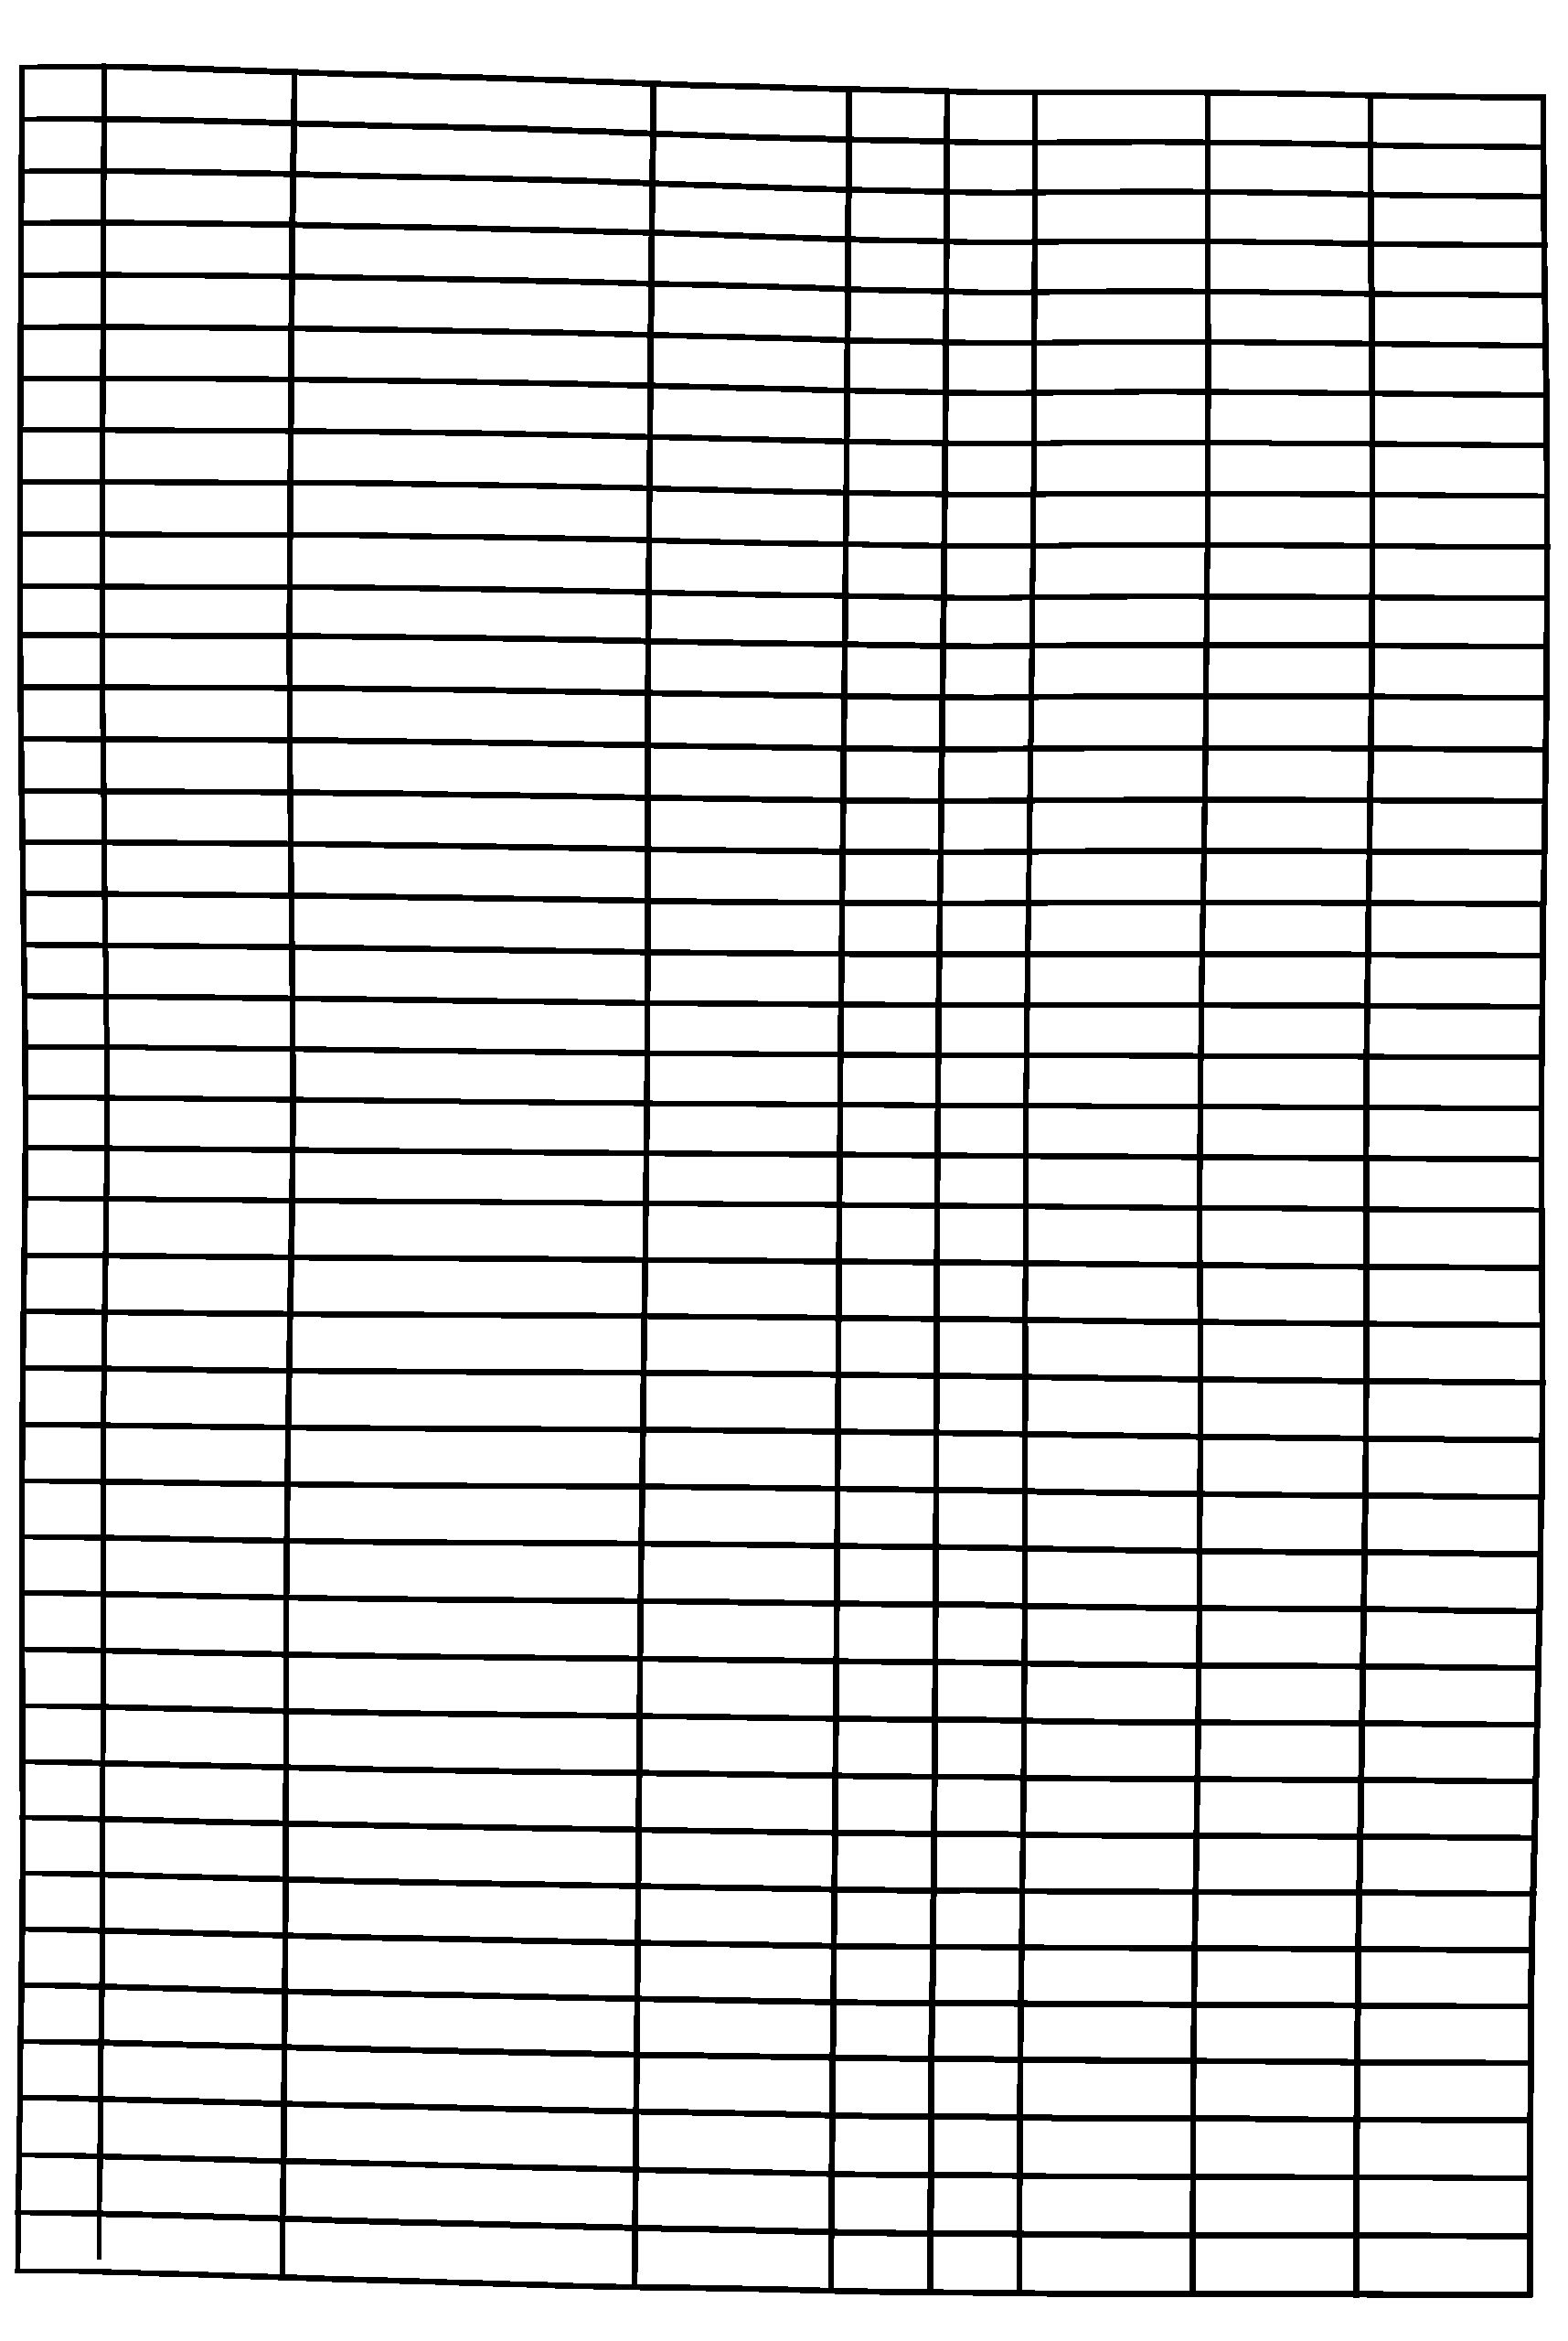

In [ ]:
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5

beta = 1.0 - alpha# This function helps to add two image with specific weight parameter to get a third image as summation of two image.

img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)

img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)

(thresh, img_final_bin) = cv2.threshold(img_final_bin, 140,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(img_final_bin)

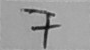

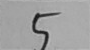

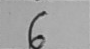

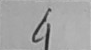

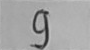

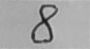

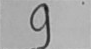

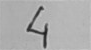

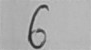

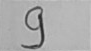

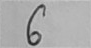

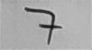

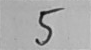

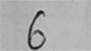

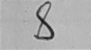

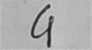

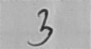

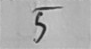

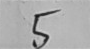

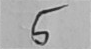

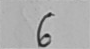

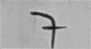

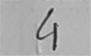

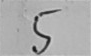

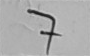

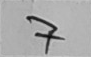

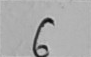

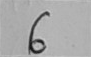

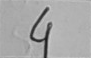

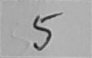

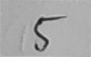

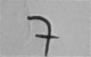

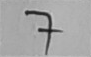

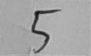

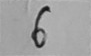

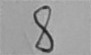

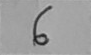

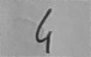

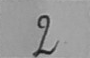

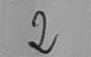

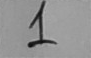

In [ ]:
# Find contours for image, which will detect all the boxes
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours.reverse() # đảo ngược mảng contours
i = 0
img_el = []
#idx = 0
for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
    #only selecting boxes within certain width height range
    if (w > 89 and w < 96 and h > 1 and h < 70):
        #idx += 1
        img_el.append(img[y:y+h, x:x+w])
        cv2_imshow(img_el[i])
        print("\n")
        i += 1

In [ ]:
# số lượng các ô đã cắt
print(len(img_el))

41


In [ ]:
#@title Default title text
print(new_img[3].shape[1])

In [ ]:
#@title thử lọc ảnh theo index
i = 3
img_el = []
for k in range(3, len(new_img)):
  if (k == i):
      cv2_imshow(new_img[k])
      i += 9

In [ ]:
#@title Default title text

def imshow(img, label='default'):
    cv2_imshow(img)
    
#get set of all y-coordinates to sort boxes row wise
def getsety(boxes):
    ally = []
    for b in boxes:
        ally.append(b[1])
    ally = set(ally)
    ally = sorted(ally)
    return ally

#sort boxes by y in certain range, because if image is tilted than same row boxes 
#could have different Ys but within certain range
def sort_boxes(boxes, y, row_column):
    l = []
    for b in boxes:
        if (b[2] > 10 and b[3] > 15 and b[3] < 50):
            if b[1] >= y - 7 and b[1] <= y + 7:
                l.append(b)

    if l in row_column:
        return row_column
    else:
        row_column.append(l)
        return row_column

#sort each row using X of each box to sort it column wise
def sortrows(rc):
    new_rc = []
    for row in rc:
        r_new = sorted(row, key = lambda cell: cell[0])
        new_rc.append(r_new)
    return new_rc

row_column = []
for i in getsety(boundingBoxes):
    row_column = sort_boxes(boundingBoxes, i, row_column)
row_column = [i for i in row_column if i != []]

#final np array with sorted boxes from top left to bottom right
row_column = sortrows(row_column)

In [ ]:
#@title Default title text
img_el = []
for k in new_img:
  if (k.shape[1] <= 95 & k.shape[1] >= 90):
      cv2_imshow(k)
      img_el.append(k)

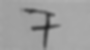

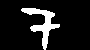

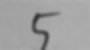

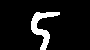

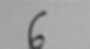

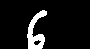

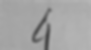

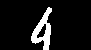

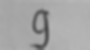

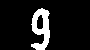

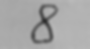

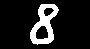

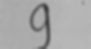

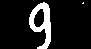

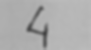

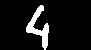

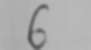

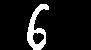

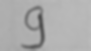

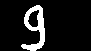

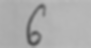

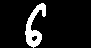

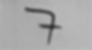

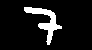

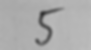

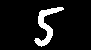

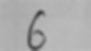

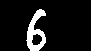

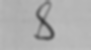

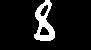

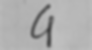

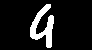

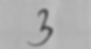

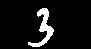

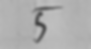

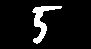

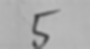

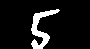

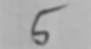

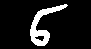

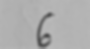

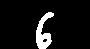

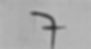

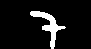

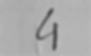

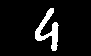

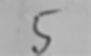

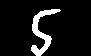

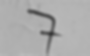

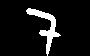

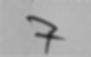

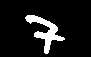

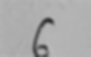

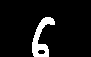

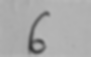

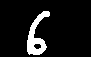

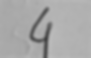

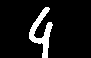

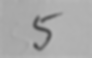

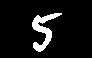

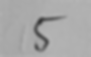

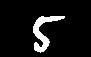

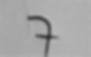

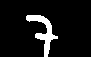

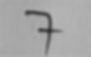

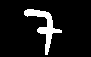

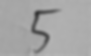

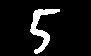

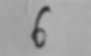

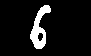

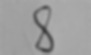

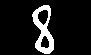

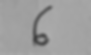

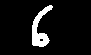

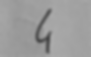

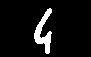

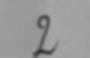

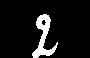

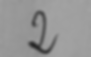

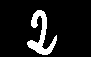

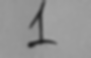

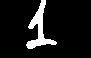

In [ ]:
gray = [] 
thres = []
img_bin = []
img_blur = []
for i in range(0, len(img_el)):
    # Ta dung 7x7 kernel voi Sigma = 0, cho ta StD = 0.3*((ksize-1)*0.5 - 1) + 0.8
    img_blur.append( cv2.GaussianBlur(img_el[i], (7, 7), 0))
    cv2_imshow(cv2.GaussianBlur(img_el[i], (7, 7), 0))
    thres.append(cv2.adaptiveThreshold(img_blur[i], 255,  cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 191, 17))
    img_bin.append(255 - thres[i])
    cv2_imshow(img_bin[i])

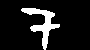

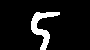

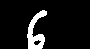

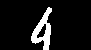

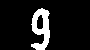

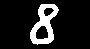

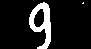

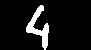

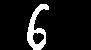

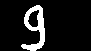

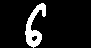

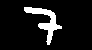

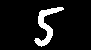

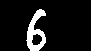

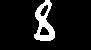

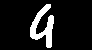

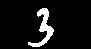

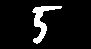

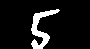

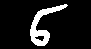

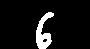

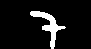

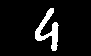

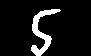

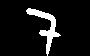

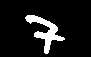

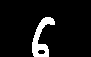

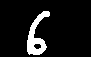

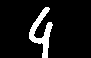

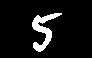

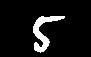

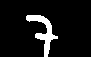

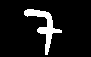

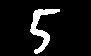

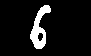

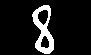

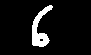

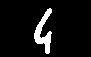

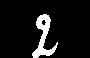

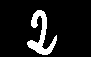

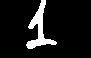

In [ ]:
# biến đổi kích thước ảnh
re = []
for i in range(0,41):
    re1 = cv2.resize(img_bin[i],(28, 28), interpolation= cv2.INTER_LINEAR)
    re.append(re1)
    cv2_imshow(img_bin[i])
    cv2_imshow(re[i])

In [ ]:
import tensorflow as tf

11501568/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 flatten (Flatten)           (None, 3872)              0 

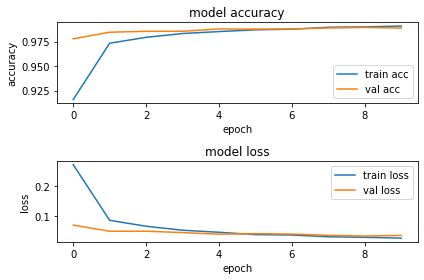

INFO:tensorflow:Assets written to: ./models/model_tensorflow/assets


In [ ]:
#@title Train model

#ta có thể sử dụng bộ dữ liệu mnist thông qua keras
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


# nhị phân hóa training dataset
mask = x_train > 127.5
maskb = x_train <= 127.5
x_train[mask] = 255
x_train[maskb] = 0

# nhị phân hóa testing dataset
mask_test = x_test > 127.5
mask_test_b = x_test <= 127.5
x_test[mask_test] = 255
x_test[mask_test_b] = 0

# Shift to -1 to 1
x_train, x_test = (x_train - 127.5) / 127.5, (x_test - 127.5) / 127.5


# Reserve 15,000 samples for validation
x_val = x_train[-15000:]
y_val = y_train[-15000:]
x_train = x_train[:-15000]
y_train = y_train[:-15000]

# Simple CNN architecture with 3 conv layers
# INPUT -> CONV3-32 -> RELU -> CONV3-32 -> RELU  
# -> CONV3-32 -> RELU -> POOL -> DROPOUT -> FC -> RELU -> DROPOUT -> SOFTMAX
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                           activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                           activation='relu'),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                           activation='relu'),
    # regularization
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # regularization
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    # regularization
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], x_val.shape[2], 1))


model_data = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))
model.evaluate(x_test, y_test, verbose=2)

# plot
plt.subplot(2, 1, 1)
plt.plot(model_data.history['accuracy'])
plt.plot(model_data.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc', 'val acc'], loc='lower right')
plt.subplot(2, 1, 2)
plt.plot(model_data.history['loss'])
plt.plot(model_data.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'], loc='upper right')
plt.tight_layout()
plt.show()


model.save('./models/model_tensorflow')

In [ ]:
predict_model = tf.keras.models.load_model('./models/model_tensorflow')
predict_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                        

In [ ]:
#@title Default title text
from PIL import Image, ImageEnhance
def preprocess(img, factor: int):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = Image.fromarray(img)
    enhancer = ImageEnhance.Sharpness(img).enhance(factor)
    if gray.std() < 30:
        enhancer = ImageEnhance.Contrast(enhancer).enhance(factor)
    return np.array(enhancer)

In [ ]:
def get_com_shift(img):
    """ Get the delta x and y from center based on center of mass. """
    M = cv2.moments(img)
    height, width = img.shape
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    shift_x = np.round(width/2.0-cX).astype(int)
    shift_y = np.round(height/2.0-cY).astype(int)
    return shift_x, shift_y
def shift_by(img, delta_x, delta_y):
    """ Returns a translated image center by delta_x and delta_y. """
    rows, cols = img.shape
    M = np.float32([[1, 0, delta_x], [0, 1, delta_y]])
    return cv2.warpAffine(img, M, (cols, rows))
sai = 0;
for i in range(0,41):
    roi_fit_20x20 = 20 / max(re[i].shape[0], re[i].shape[1])
    # Resize preserving binary format with INTER_NEAREST
    re[i] = cv2.resize(re[i], None, fx=roi_fit_20x20, fy=roi_fit_20x20, interpolation=cv2.INTER_LINEAR)
    roi_background = np.zeros((28, 28), dtype=re[i].dtype)
    # Place the digit in the roi_background, 4 from top and 4 from left.
    roi_background[4:4+re[i].shape[0], 4:4+re[i].shape[1]] = re[i]
    delta_x, delta_y = get_com_shift(roi_background)
    roi_background = shift_by(roi_background, delta_x, delta_y)
    roi_background = roi_background - 117.5
    roi_background /= 117.5
    prediction = predict_model(np.reshape(roi_background, (1, 28, 28, 1)))
    predicted_digit = np.argmax(prediction)
    print(predicted_digit)
    if (predicted_digit != diem[i]):
      sai += 1
    cv2_imshow(re[i])

7


5


6


6


3


8


9


4


6


8


6


7


5


6


8


4


3


5


5


5


6


7


6


5


7


7


6


6


4


3


5


7


7


5


1


8


6


6


1


8


1


In [ ]:
# số lượng số nhận dạng sai
print(sai)

9


In [ ]:
#@title Default title text
roi_fit_20x20 = 20 / max(re[0].shape[0], re[0].shape[1])
roi = []
for i in range (0, 41):
    roi.append(cv2.resize(re[i], None, fx=roi_fit_20x20, fy=roi_fit_20x20, interpolation=cv2.INTER_NEAREST)) 
    cv2_imshow(roi[i])

In [ ]:
#@title Default title text
len(roi)

In [ ]:
#@title Default title text
roi_background = []
for i in range (0, 40):
    roi_background.append(np.zeros((28, 28), dtype=roi[i].dtype))
    roi_background[i][4:4+roi[i].shape[0], 4:4+roi[i].shape[1]] = roi[i]
    cv2_imshow(roi_background[i])

In [ ]:
#@title Default title text
def get_com_shift(img):
    """ Get the delta x and y from center based on center of mass. """
    M = cv2.moments(img)
    height, width = img.shape
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    shift_x = np.round(width/2.0-cX).astype(int)
    shift_y = np.round(height/2.0-cY).astype(int)
    return shift_x, shift_y
def shift_by(img, delta_x, delta_y):
    """ Returns a translated image center by delta_x and delta_y. """
    rows, cols = img.shape
    M = np.float32([[1, 0, delta_x], [0, 1, delta_y]])
    return cv2.warpAffine(img, M, (cols, rows))
    
# Get the translation based on center of mass
delta_x = []
delta_y = []
prediction = []
predicted_digit = []
for i in range (0, 40):
    x, y = get_com_shift(roi_background[i])
    delta_x.append(x)
    delta_y.append(y)
    roi_background[i] = shift_by(roi_background[i], delta_x[i], delta_y[i])
    roi_background[i] = roi_background[i] - 127.5
    roi_background[i] /= 127.5
    prediction.append(predict_model(np.reshape(roi_background[i], (1, 28, 28, 1))))
    predicted_digit.append(np.argmax(prediction[i]))
    print(predicted_digit[i])
    cv2_imshow(roi[i])